44100
603285
512


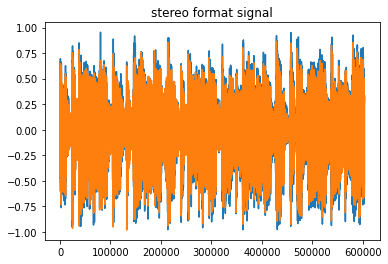

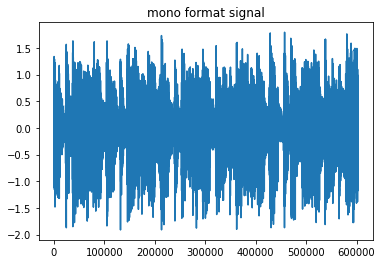

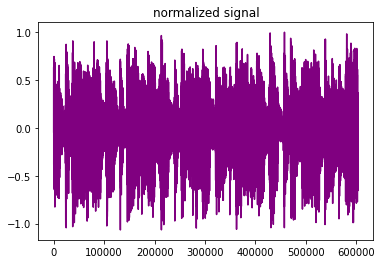

In [ ]:
#ergastiriaki askisi 2
#Dorothea Koumidou 03119712
#Giorgos Charalampous 03119706

#meros 1
#Bhma 1.0

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import soundfile as sf

sgn,fs = sf.read('music.wav')        # stereo sima pou tha metatrapei se mono
print(fs)
print(len(sgn)) 

plt.figure(0)
plt.plot(sgn)               
plt.title('stereo format signal')

monosgn= np.sum(sgn,axis=1)                 #metatropi stereou se mono
plt.figure(1)
plt.plot(monosgn)
plt.title('mono format signal')

max=np.max(monosgn)                        #kanonikopoisi tou simatos
monosgn=monosgn/max


plt.figure(2)
plt.plot(monosgn, color='purple')
plt.title('normalized signal')

N=512                                    #parathiropoihsh 
if len(monosgn)%512==0:
    counter=len(monosgn)/512
else:
    counter=(len(monosgn)//512)+1

sgnsplit=[]
sgnsplit.append(monosgn[:512])
start=512
end=1024

for i in range(counter-1):
    if i==counter-2:       #metavasi sto telefteo parathiro 
        a=len(monosgn)%512   #to teleftaio parathiro ypolipetai 512-a stoixeia poy tha ta simplirosoume me 0
        z=np.zeros(512-a)   
        sgnsplit.append(np.concatenate((monosgn[start:start+a],z), axis=0))         #enonoume ta stoixeia tou telefteou parathirou me ta 0
        break        
    sgnsplit.append(monosgn[start: end])       #simplironoume ton pinaka sgnsplit me ta parathirs pou idi vrikama
    start+=N                    #metavasi sto epomeno parathiro
    end+=N
print(len(sgnsplit[counter-1]))  



In [ ]:
#bhma 1.1
import math

def bark(f):
    b= 13*np.arctan(0.00076*f) + 3.5*np.arctan((f/7500)**2 )
    return b

w=np.hanning(512)      #hanning parathiro

In [ ]:
#Bhma 1.1
Pk = []
for n in sgnsplit:
    pk_internal = []
    for k in range(0,512//2):
        pk_internal.append(10*np.log10(np.abs(np.sum(w*n*np.exp(-1j*(2*np.pi*k*np.arange(0,512)/512))))**2) + 90.302)
    Pk.append(pk_internal)

In [ ]:
print(np.array(Pk).shape)
print(np.transpose(Pk).shape)

summedPks = np.mean(np.transpose(Pk),axis=1)
print(summedPks.shape)
print(summedPks[255])

(1179, 256)
(256, 1179)
(256,)
11.977642829693487


Text(0.5, 1.0, 'Mean Power spectrum of the frequencies')

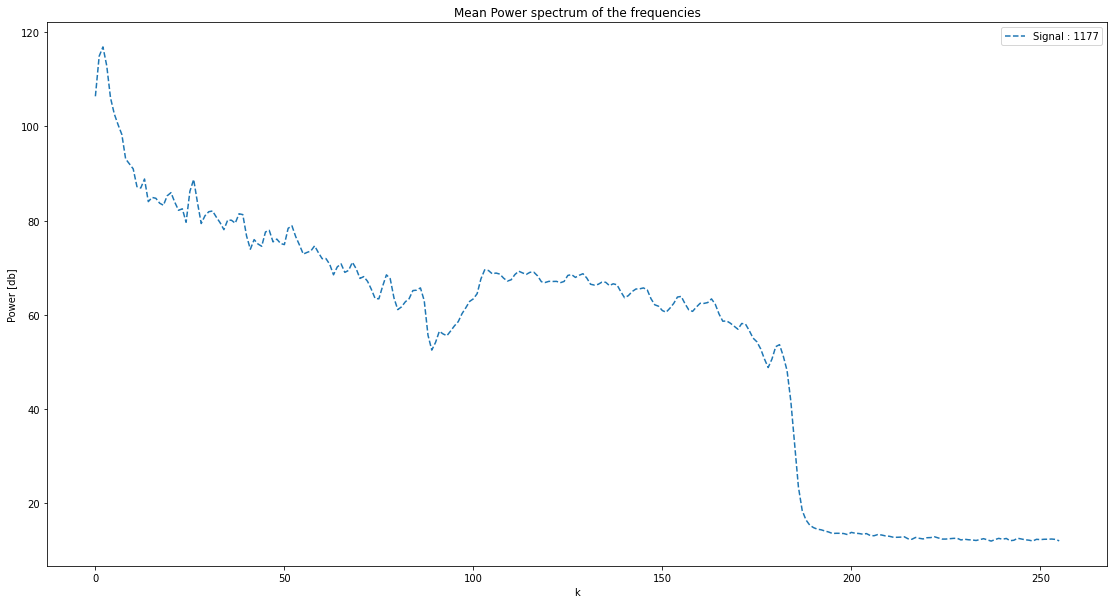

In [ ]:
plt.figure(figsize=(19,10))
#for i in range(0,256):                                                    #Power spectrum of all frequencies frequencies
  #plt.plot(np.arange(0,512//2),Pk[i][:],label='Signal : ' + str(i))
plt.plot(np.arange(0,512//2),summedPks,'--',label='Signal : ' + str(i))    #Mean Power spectrum of the frequencies
plt.xlabel("k")
plt.ylabel("Power [db]")
plt.legend(loc='best')
plt.title('Mean Power spectrum of the frequencies')

In [ ]:
#Bhma 1.2 
def select_Dk(k):
	if(k<64):	
		return [2]
	elif (k<127):	
		return [2,3]
	elif (k<250):	
		return np.arange(2,7)

#print(select_Dk(190))

St = np.zeros(256).astype(bool)
for k in range(3,250):
	if summedPks[k]> summedPks[k-1] and summedPks[k]> summedPks[k+1]:
		bools = []
		for Dk in select_Dk(k):
			if summedPks[k] > summedPks[k+Dk] and summedPks[k]> summedPks[k-Dk]:
				bools.append(True)
			else:
				bools.append(False)
		if np.array(bools).all():
			St[k] = True

#for i in range (256):
#	if(St[i]==True):
#			print(i)

In [ ]:
#isxus tonikes maskes 
P_TM=[]
for k in range (0,256):
  if St[0]==1:
    ptm=10*np.log10(10**(0.1*summedPks[k])+10**(0.1*summedPks[k+1]))
  if St[255]==1:
    ptm=10*np.log10(10**(0.1*summedPks[k-1])+10**(0.1*summedPks[k]))
  if St[k]==0:
    ptm=0
  else:
    ptm=10*np.log10(10**(0.1*summedPks[k-1])+10**(0.1*summedPks[k])+10**(0.1*summedPks[k+1]))
  P_TM.append(ptm)

print(np.shape(P_TM))
print(P_TM)

(256,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 91.76696876400023, 0, 0, 0, 0, 0, 0, 89.87090892941848, 0, 0, 0, 0, 0, 91.4669821661176, 0, 0, 0, 0, 86.34154196719305, 0, 0, 0, 84.27030528483363, 0, 0, 85.56170231964272, 0, 0, 0, 0, 0, 0, 0, 81.87809706314641, 0, 0, 0, 0, 0, 82.80830490046748, 0, 0, 0, 0, 0, 78.58829647993846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74.93360183716213, 0, 0, 0, 0, 0, 0, 0, 0, 72.26843205448057, 0, 0, 0, 0, 0, 0, 0, 0, 69.54722421172613, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73.6909938261646, 0, 0, 0, 0, 0, 0, 0, 0, 73.66159425124646, 0, 0, 0, 73.5422616219793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73.07505040128979, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70.25640535522798, 0, 0, 0, 0, 0, 0, 0, 0, 0, 68.14347928165866, 0, 0, 0, 0, 0, 0, 0, 67.51425911858293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17.473338095224143, 0, 0,

Text(0.5, 1.0, 'Ισχύς Τονικών Μασκών')

<Figure size 432x288 with 0 Axes>

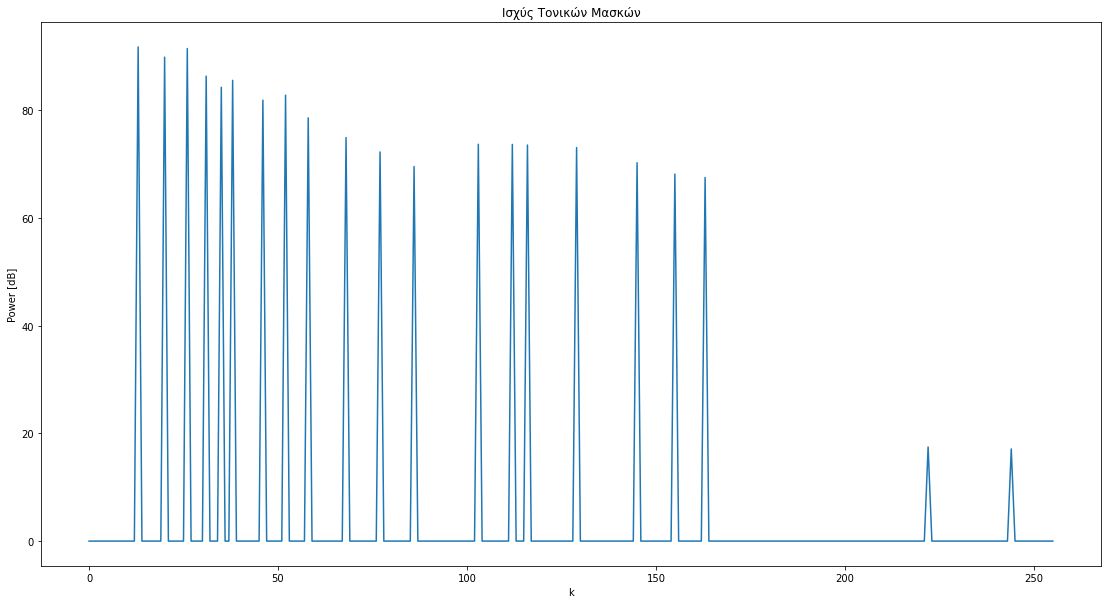

In [ ]:
k=np.linspace(0,255,256)
plt.figure(0)
plt.figure(figsize=(19,10))
plt.plot(k,P_TM)
plt.xlabel("k")
plt.ylabel("Power [dB]")
plt.title("Ισχύς Τονικών Μασκών")

(256, 1179)
(256,)


Text(0.5, 1.0, 'Ισχύς Μασκών Θορύβου')

<Figure size 432x288 with 0 Axes>

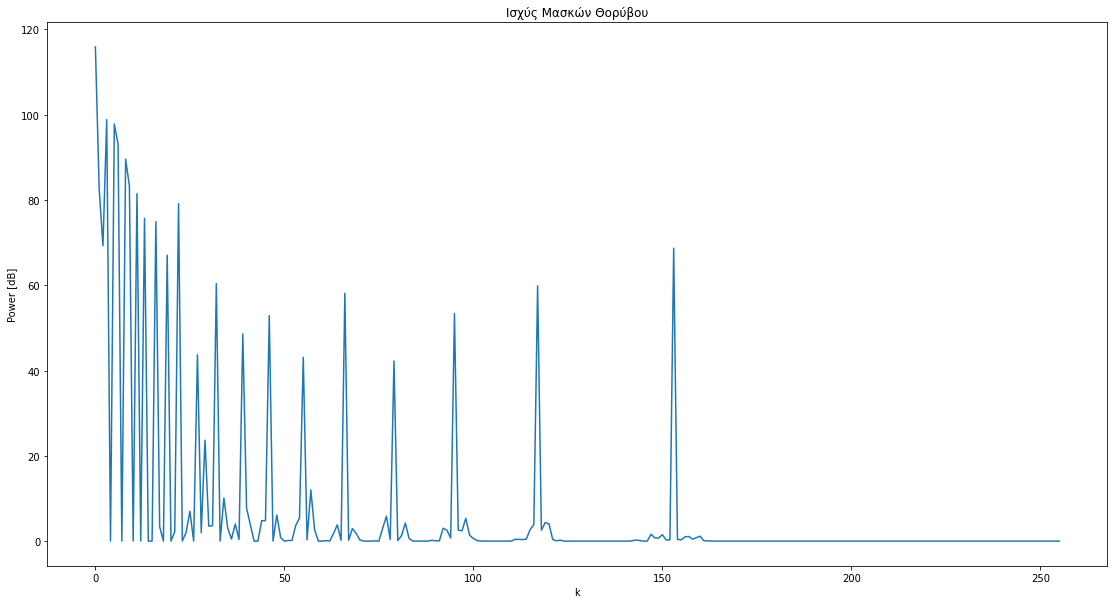

In [ ]:
#Isxus maskes thorivou
P_NM=np.load('P_NM.npy')
print(P_NM.shape)

summedPNM= np.mean(P_NM,axis=1)
print(summedPNM.shape)

k=np.linspace(0,255,256)
plt.figure(0)
plt.figure(figsize=(19,10))
plt.plot(k,summedPNM)
plt.xlabel("k")
plt.ylabel("Power [dB]")
plt.title("Ισχύς Μασκών Θορύβου")

(256,)
(256,)
(155,)
(107,)


<Figure size 432x288 with 0 Axes>

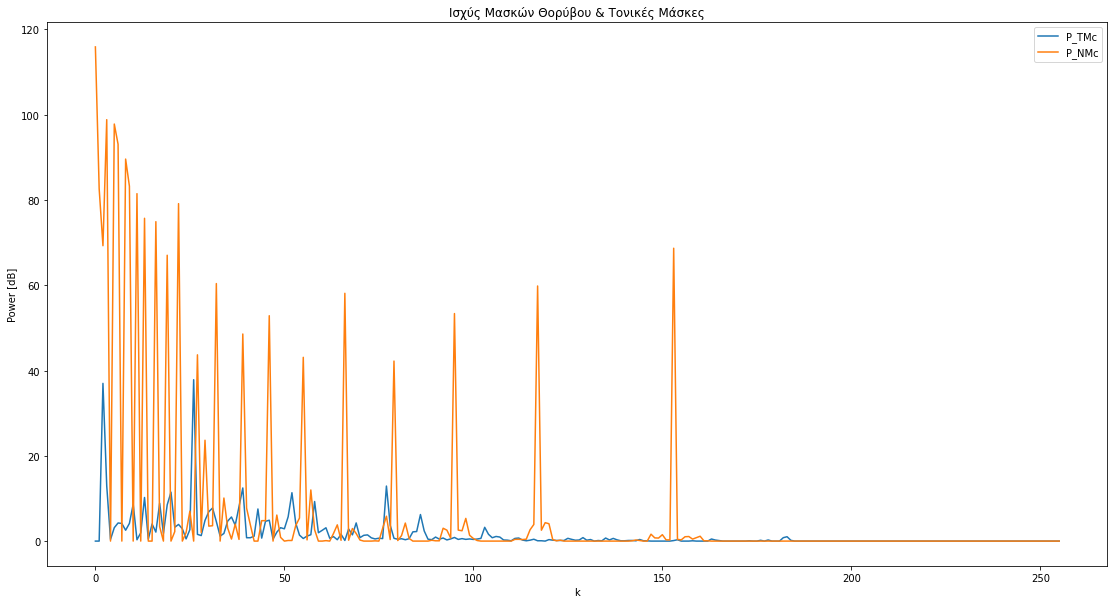

In [ ]:
#Bhma 1.3 
P_NMc=np.load('P_NMc.npy')   #tonikes maskes meta tin meiwsh
P_TMc=np.load('P_TMc.npy')   #maskes thorivou meta tin meiwsh 

meanP_NMc= np.mean(P_NMc,axis=1)  #mesos oros tis isxios gia tin k-sixnotita olwn twn parathirwn gia tis maskes thorivou
meanP_TMc= np.mean(P_TMc,axis=1)  #mesos oros tis isxios gia tin k-sixnotita olwn twn parathirwn gia tis tonikes maskes 
print(meanP_NMc.shape)
print(meanP_TMc.shape)

cntrL=[]                               #counters gia to bhma 1.5
cntrM=[]
for k in range (256):
  if meanP_NMc[k]!=0:
    cntrM.append(k)
  if meanP_TMc[k]!=0:
    cntrL.append(k)
print(np.shape(cntrL))
print(np.shape(cntrM))

k=np.linspace(0,255,256)
plt.figure(0)
plt.figure(figsize=(19,10))
plt.plot(k,meanP_TMc,k,meanP_NMc)
plt.xlabel("k")
plt.ylabel("Power [dB]")
plt.title("Ισχύς Μασκών Θορύβου & Τονικές Μάσκες")
plt.legend(['P_TMc', 'P_NMc'], loc='best')

In [ ]:
#Bhma1.4
Barks=[]
for i in range(1,257):
   b=i*(22050/256)
   b=bark(b)
   Barks.append(b)

SF_Tm=np.zeros((256,256))
SF_Nm=np.zeros((256,256))
for i in range(256):
  for j in range(256):
    Db=Barks[i]-Barks[j]
    if Db>=-3 and Db<-1:
      SF_Tm[i][j]=17*Db-0.4*meanP_TMc[j]+11
      SF_Nm[i][j]=17*Db-0.4*meanP_NMc[j]+11
    if Db>=-1 and Db<0:
      SF_Tm[i][j]=(0.4*meanP_TMc[j]+6)*Db
      SF_Nm[i][j]=(0.4*meanP_NMc[j]+6)*Db
    if Db>=0 and Db<1:
      SF_Tm[i][j]=Db*(-17)
      SF_Nm[i][j]=Db*(-17)
    if Db>=1 and Db<8:
      SF_Tm[i][j]=(0.15*meanP_TMc[j]-17)*Db-0.15*meanP_TMc[j]
      SF_Nm[i][j]=(0.15*meanP_NMc[j]-17)*Db-0.15*meanP_NMc[j]

print(np.shape(SF_Tm))

T_Tm=np.zeros((256,256))
T_Nm=np.zeros((256,256))
for i in range(256):
  for j in range(256):
    T_Tm[i][j]=meanP_TMc[j]-0.275*Barks[j]+SF_Tm[i][j]-6.025
    T_Nm[i][j]=meanP_NMc[j]-0.175*Barks[j]+SF_Nm[i][j]-2.025
#print(T_Nm)   
#print(T_Tm)

(256, 256)


[25.866905584234836, 14.845877790185327, 10.721316524988449, 8.502852236361942, 7.095039734397721, 6.110057817059093, 5.373618583691816, 4.7948098634808005, 4.320951394787291, 3.91894532646452, 3.5665698929651404, 3.2480334029873283, 2.9515476826576665, 2.6679398661655123, 2.3898359667120745, 2.111178657422631, 1.8269507493008739, 1.5330305890978442, 1.2261341466333364, 0.9038138277834082, 0.5644923360120114, 0.2075144738888888, -0.1667975824961104, -0.5570982493416764, -0.9609929584662045, -1.3750426339378354, -1.794805851953005, -2.2149239105396985, -2.629251204875492, -3.031030143399911, -3.4131065183602547, -3.7681779828149624, -4.089065333939351, -4.368993911448186, -4.601870816330641, -4.782543013475016, -4.90702180313606, -4.972660643003923, -4.978275792766078, -4.9242025639086755, -4.812283839916469, -4.645791682760887, -4.4292869319167885, -4.168425409498801, -3.8697223837834955, -3.540289091365426, -3.187556236719281, -2.818999431951775, -2.4418805581106096, -2.06301715656561

<Figure size 432x288 with 0 Axes>

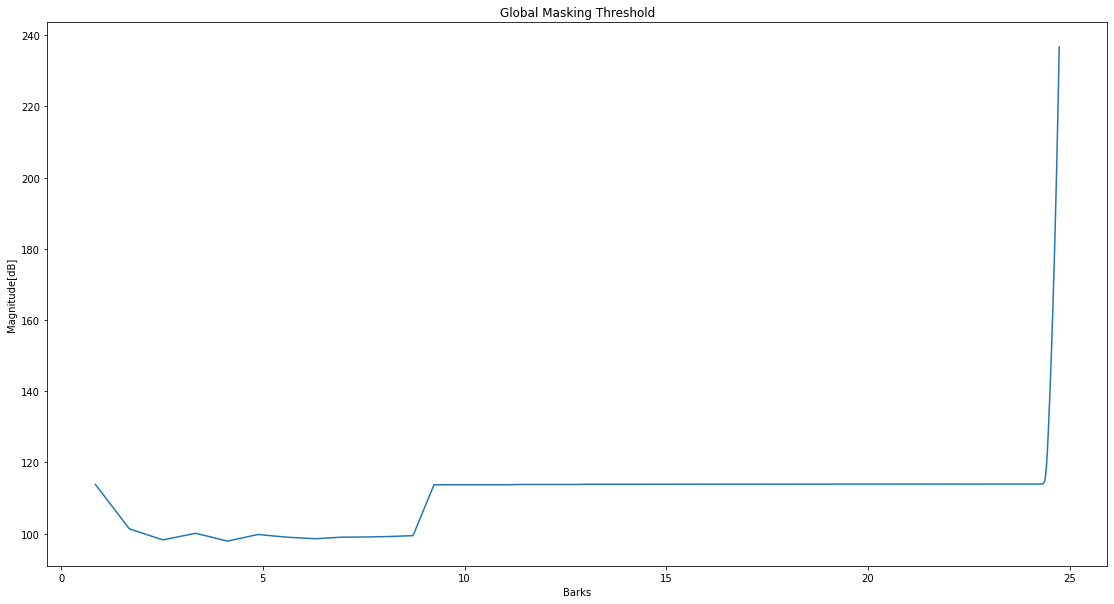

In [ ]:
#bhma 1.5
def ath(f):
  tq=3.64*np.power((f/1000),-0.8)-6.5*np.e**(-0.6*(np.power(((f/1000)-3.3),2)))+10**(-3)*np.power((f/1000),4)
  return tq
 
Tq=[]
for i in range(1,257):
   t=i*(22050/256)
   t=ath(t)
   Tq.append(t)
print(Tq)
Tg=[]
for i in range(256):
  sumT_TM=0
  sumT_NM=0
  for l in cntrL:
    sumT_TM+=10**(0.1*T_Tm[i][l])
  for m in cntrM:
     sumT_NM+=10**(0.1*T_Nm[i][m])
  tg=10*np.log10(10**(0.1*Tq[i])+ sumT_TM + sumT_NM)
  Tg.append(tg)


plt.figure(0)
plt.figure(figsize=(19,10))
plt.plot(Barks,Tg)
plt.xlabel("Barks")
plt.ylabel("Magnitude[dB]")
plt.title("Global Masking Threshold")
print(Tg)

<Figure size 432x288 with 0 Axes>

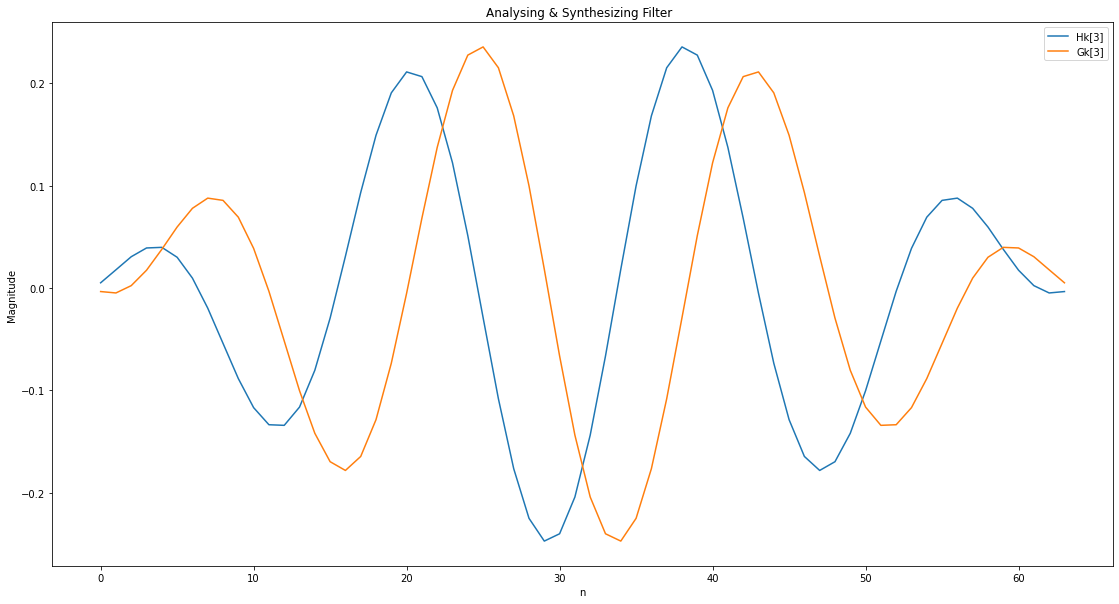

In [ ]:
#Meros 2

#bhma 2.0
Hk=[]                                            #Filter sinthesis
Gk=[]                                            #Filter analysis
M=32
n=np.linspace(0,63,64)
for k in range(0,32):
    hk=np.sin((n+1/2)*(np.pi/2/M))*(np.sqrt(2/M)*np.cos(((2*n+M+1)*(2*k+1))*np.pi/4/M))
    Hk.append(hk)
    gi=[]
    for i in range(0,64):
        g=Hk[k][64-1-i]
        gi.append(g)
    Gk.append(gi)

plt.figure(0)
plt.figure(figsize=(19,10))
plt.plot(n,Hk[3],n,Gk[3])
plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title("Analysing & Synthesizing Filter  ")
plt.legend(['Hk[3]', 'Gk[3]'], loc='best')


In [ ]:
FilterNm=32                           #Number of Filters
for k in range(FilterNm):             #for each filter do 
    # Filter with H
    #Bhma 2.1
    uk = [np.convolve(row, Hk[k],'same') for row in sgnsplit] #(1179, 512)  convolution of the splitted signal with each filter H
    # Downsample/Decimation 
    yk = [i[::32] for i in uk] #(1179, 16) 


In [ ]:
#Bhma 2.2

R=2**16
fi=int(fs*np.pi/32/2)    #oriakh timh sixnotitas gia kathe filtro [fk-fi,fk+fi]
print(fi)
fk=[]
for k in range(1,32):    #kentrikes sixnotites gia kathena apo ta 32 filtra 
    fk.append((2*k-1)*fi)
#print(fk)

length=len(Tg)//32 
Tg_splitted=[Tg[:length]]          #parathiropoish tou Tg sto diastima kathe filtrou analisis 
start=length
stop=2*length
for k in range(1,32):
    Tg_splitted.append(Tg[start:stop])
    start+=length
    stop+=length

#print(Tg_splitted)
#print(np.shape(Tg_splitted))  #(32,8)


2164


In [ ]:
#Quantization function 
import numpy as np                             
from matplotlib import pyplot as plt
import os
from IPython.display import Audio
import sys
sys.path.append('..')
%matplotlib inline

def quantize_uniform(x, quant_min, quant_max, quant_level):
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

In [ ]:
Bk=[]                      #Bits for encoding
for k in range(0,32):
    bk=int(np.ceil((np.log2(R/(np.min(Tg_splitted[k])))-1)))
    Bk.append(bk)
print(Bk)
print(np.shape(Bk))

#D=Xm/(2**Bk[k])  Xm=xmax-xmin=Range

def calc_xmax(s,Bk):
  xm=np.max(s)-np.min(s)                  #find the range for  each subband               
  D=xm/(2**Bk)
  return D*(2**(Bk-1))

def calc_xmax2(s,Bk):
  xm=2                                    #xm=xmamx-xmin=Range range=[-1,1]                
  D=xm/(2**Bk)
  return D*(2**(Bk-1))

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8]
(32,)


In [ ]:
FilterNm=32                           #Number of Filters
for k in range(FilterNm):             #for each filter do 
    # Quantize
    #Bhma 2.2
    #1st quantizer  D based on Bk and Xm=[xmin,xmax]
    yqs = [quantize_uniform(row ,-calc_xmax(row,Bk[k]),calc_xmax(row,Bk[k]), 2**Bk[k]) for row in yk] #(1179, 16)
    #2nd quantizer  Bk=8 [-1,1]
    yqs2 = [quantize_uniform(row ,-calc_xmax2(row,8),calc_xmax2(row,8), 2**8) for row in yk]  #(1179, 16)

In [ ]:
s_n = []
s_n2= []
FilterNm=32
for k in range(FilterNm):
    # Bhma 2.3 
    # UpSample/ Interpolate
    ws = [np.interp(np.arange(np.shape(sgnsplit)[1]),np.arange(len(row)),row) for row in yqs] #(1179,512)
    ws2 = [np.interp(np.arange(np.shape(sgnsplit)[1]),np.arange(len(row)),row) for row in yqs2] #(1179,512)
    # Filter with G
    s_n.append([np.convolve(row,Gk[k]) for row in ws]) #(1179, 512)
    s_n2.append([np.convolve(row,Gk[k]) for row in ws2]) #(1179, 512)


In [ ]:
Output = np.sum(s_n,axis=0)
Output2 = np.sum(s_n2,axis=0)

In [ ]:
print(np.shape(uk))
print(np.shape(yk))
print(np.shape(yqs))
print(np.shape(yqs2))
print(np.shape(ws))
print(np.shape(ws2))
print(np.shape(s_n))
print(np.shape(s_n2))
print(np.shape(Output))
print(np.shape(Output2))

(1179, 512)
(1179, 16)
(1179, 16)
(1179, 16)
(1179, 512)
(1179, 512)
(32, 1179, 575)
(32, 1179, 575)
(1179, 575)
(1179, 575)


In [ ]:
Output=Output.reshape(1,-1)[0]
Output2=Output2.reshape(1,-1)[0]

print(np.shape(Output))
print(np.shape(Output2))

(677925,)
(677925,)


Text(0.5, 1.0, 'original signal')

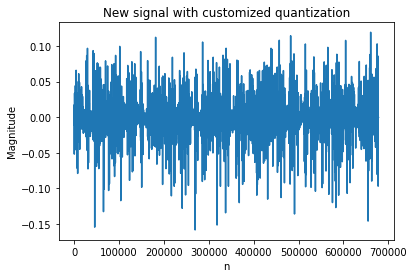

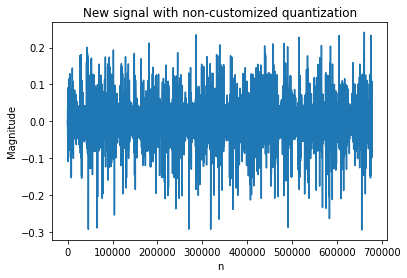

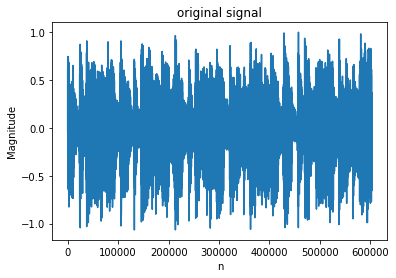

In [ ]:
n=np.linspace(0,len(Output)-1,len(Output))
plt.figure(0)
plt.plot(n,Output)
plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title("New signal with customized quantization")

n=np.linspace(0,len(Output2)-1,len(Output2))
plt.figure(1)
plt.plot(n,Output2)
plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title( "New signal with non-customized quantization")

n=np.linspace(0,603284,603285)
plt.figure(2)
plt.plot(n,monosgn)

plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title( "original signal")



In [ ]:
import soundfile as sf
song=sf.write('adaptive.wav',Output,44100)
song2=sf.write('non-adaptive.wav',Output2,44100)